In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:

pd.set_option('display.max_columns', None)

### Load Data

In [3]:
reviews = pd.read_csv("reviews.csv")
print(reviews.shape)
reviews.head()


(84849, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [4]:
listings = pd.read_csv("listings.csv")
print(listings.shape)
listings.head()


(3818, 92)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
calendar = pd.read_csv("calendar.csv")
print(calendar.shape)
calendar.head()

(1393570, 4)


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


### Explore Datasets

In [7]:
print(reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB
None


In [8]:
print(calendar.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB
None


In [9]:
print(listings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [10]:
reviews_df = reviews
listings_df = listings
calendar_df = calendar

### Three Business Questions
1. What are the busiest times of the year to visit Seattle, and how do prices change during these periods?
2. How do the amenities and descriptions of listings vary across different neighborhoods in Seattle?
3. Is there a trend in the number of reviews that can indicate an increase in Airbnb activity over time?


### Data Preperation

In [12]:
# Handling missing data
reviews_df = reviews_df.dropna()
calendar_df = calendar_df.dropna()
listings_df = listings_df.fillna(method='ffill')

### Data Wrangling

In [18]:
# Function to clean and convert currency columns
def clean_currency(column):
    return column.replace({'\$': '', ',': ''}, regex=True).astype(float)

listings_df['monthly_price'] = clean_currency(listings_df['monthly_price'])
listings_df['security_deposit'] = clean_currency(listings_df['security_deposit'])
listings_df['weekly_price'] = clean_currency(listings_df['weekly_price'])
listings_df['price'] = clean_currency(listings_df['price'])

In [19]:
calendar_df['price'] = clean_currency(calendar_df['price'])

C:\Users\manys001\AppData\Local\Temp\ipykernel_19676\3344179665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendar_df['price'] = clean_currency(calendar_df['price'])


In [14]:
# Convert necessary columns to appropriate data types
calendar_df['date'] = pd.to_datetime(calendar_df['date'])

C:\Users\manys001\AppData\Local\Temp\ipykernel_19676\3695695220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendar_df['date'] = pd.to_datetime(calendar_df['date'])


### EDA

In [20]:
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0


## Question 1: Busiest times and price changes

In [ ]:
print("\nAnalyzing busiest times and price changes...")
busy_times = calendar_df.groupby('date').size()
price_trend = calendar_df.groupby('date')['price'].mean()

In [26]:
busy_times

date
2016-01-04    1735
2016-01-05    1867
2016-01-06    1826
2016-01-07    1776
2016-01-08    1782
              ... 
2016-12-29    2835
2016-12-30    2840
2016-12-31    2859
2017-01-01    2922
2017-01-02    2776
Length: 365, dtype: int64

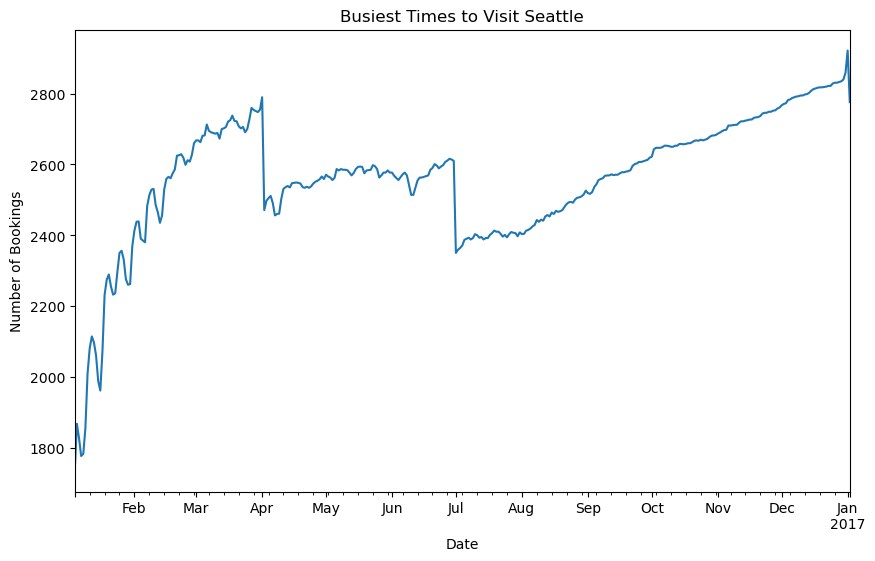

In [24]:
plt.figure(figsize=(10, 6))
busy_times.plot(title='Busiest Times to Visit Seattle', xlabel='Date', ylabel='Number of Bookings')
plt.show()

<b> Observations </b>

- The busiest times to visit Seatle during the year is March 
- Towards the end of the year is the most busiest as well, from October to December
- It's the least busiest between Jan to Feb, and between Jul to Sep

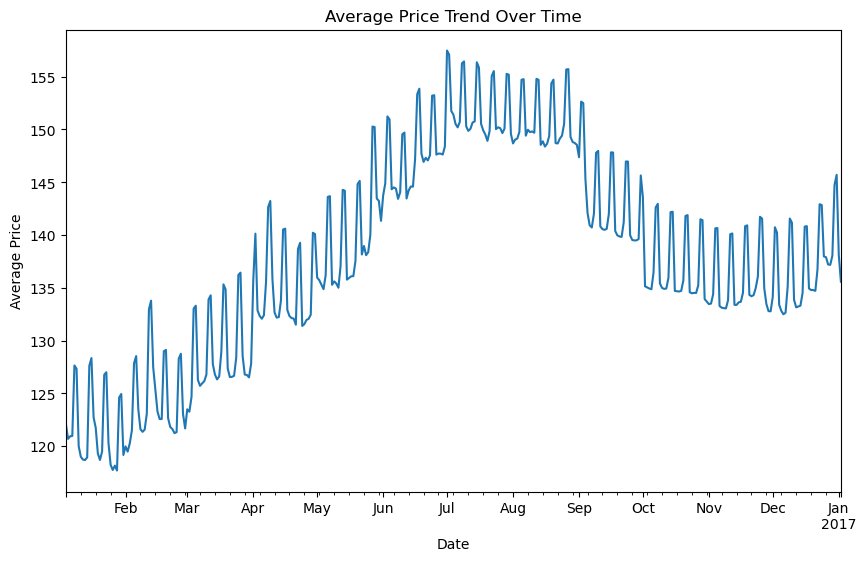

In [25]:
plt.figure(figsize=(10, 6))
price_trend.plot(title='Average Price Trend Over Time', xlabel='Date', ylabel='Average Price')
plt.show()

<b> Observations </b>
- The booking listings prices are highest (avg, $ 155) during the the summer season (Jul, Aug, Sep)
- Which is probably why there isn't much booking around this time of the year
- The listings prices are lowest during the beginning of the year

## Question 2: Neighborhood analysis


In [31]:
print("\nAnalyzing amenities and descriptions by neighborhood...")
listings_grouped = listings_df.groupby('neighbourhood_cleansed')['amenities'].apply(lambda x: ', '.join(x))



Analyzing amenities and descriptions by neighborhood...


In [32]:
listings_grouped

neighbourhood_cleansed
Adams               {TV,Internet,"Wireless Internet","Air Conditio...
Alki                {TV,"Cable TV",Internet,"Wireless Internet",Ki...
Arbor Heights       {TV,"Cable TV","Wireless Internet",Kitchen,"Fr...
Atlantic            {TV,"Cable TV",Internet,"Wireless Internet",Ki...
Belltown            {TV,"Cable TV",Internet,"Wireless Internet","A...
                                          ...                        
West Woodland       {TV,Internet,"Wireless Internet",Kitchen,Heati...
Westlake            {TV,"Cable TV",Internet,"Wireless Internet",Ki...
Whittier Heights    {TV,"Cable TV","Wireless Internet","Air Condit...
Windermere          {TV,"Cable TV",Internet,"Wireless Internet",Ki...
Yesler Terrace      {TV,Internet,"Wireless Internet","Air Conditio...
Name: amenities, Length: 87, dtype: object

In [33]:
from collections import Counter

# Count occurrences of each amenity across all neighborhoods
all_amenities = ', '.join(listings_grouped).split(', ')
amenity_counts = Counter(all_amenities)

# Convert to a DataFrame for visualization
amenities_df = pd.DataFrame(amenity_counts.items(), columns=['Amenity', 'Count']).sort_values(by='Count', ascending=False)
amenities_df


,Amenity,Count
5,{},45
494,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",11
800,"{TV,""Cable TV"",Internet,""Wireless Internet"",Po...",10
446,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",8
2861,"{Internet,""Wireless Internet"",Kitchen,Heating,...",7
...,...,...
1190,"{TV,Internet,""Wireless Internet"",""Wheelchair A...",1
1191,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1
1192,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",1
1193,"{TV,Internet,""Wireless Internet"",""Wheelchair A...",1


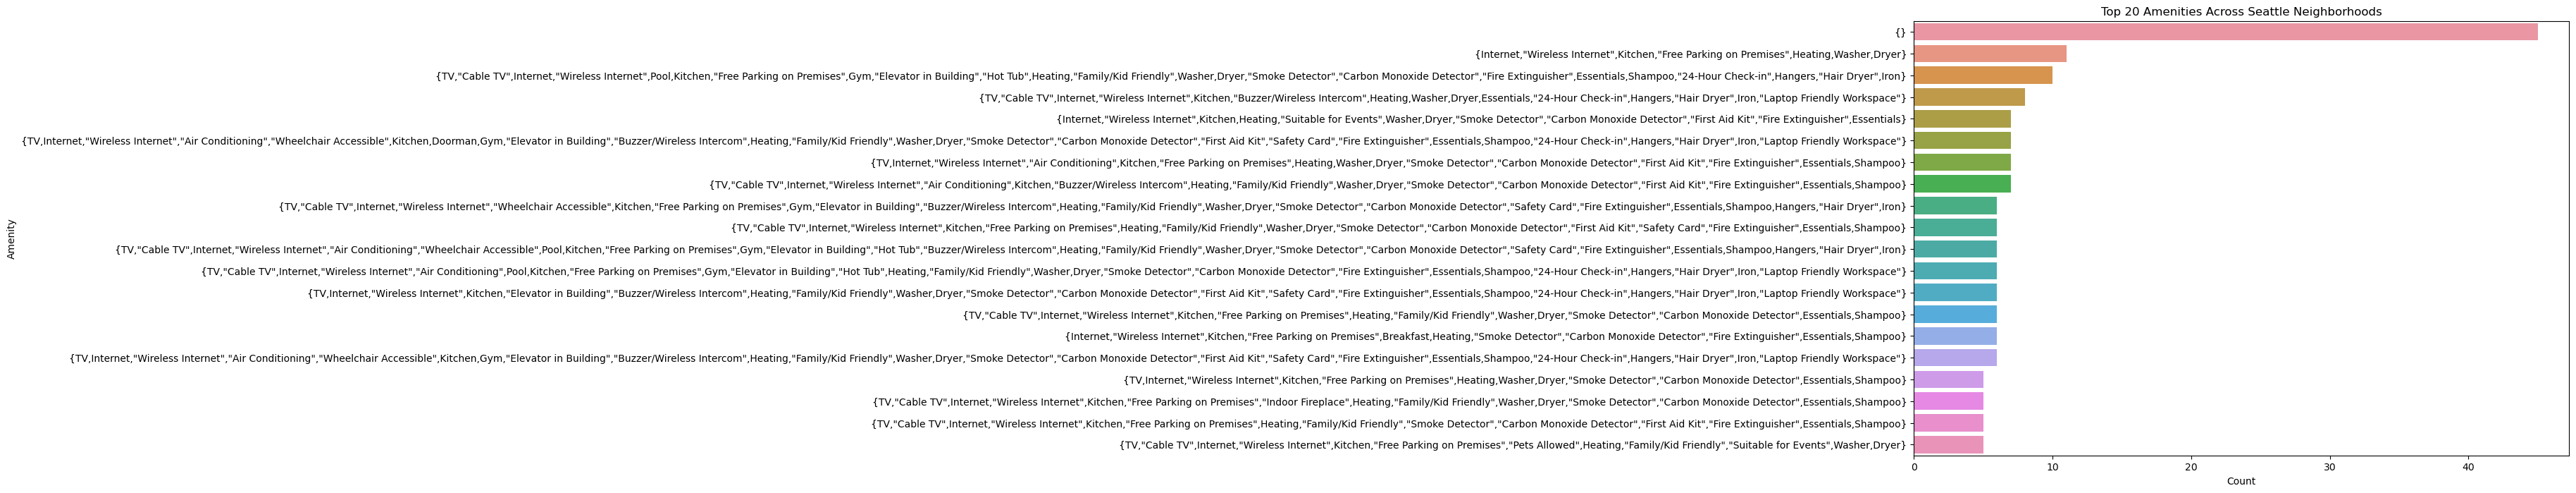

In [34]:
# Plot the top 20 amenities
plt.figure(figsize=(12, 8))
sns.barplot(data=amenities_df.head(20), x='Count', y='Amenity')
plt.title('Top 20 Amenities Across Seattle Neighborhoods')
plt.xlabel('Count')
plt.ylabel('Amenity')
plt.show()


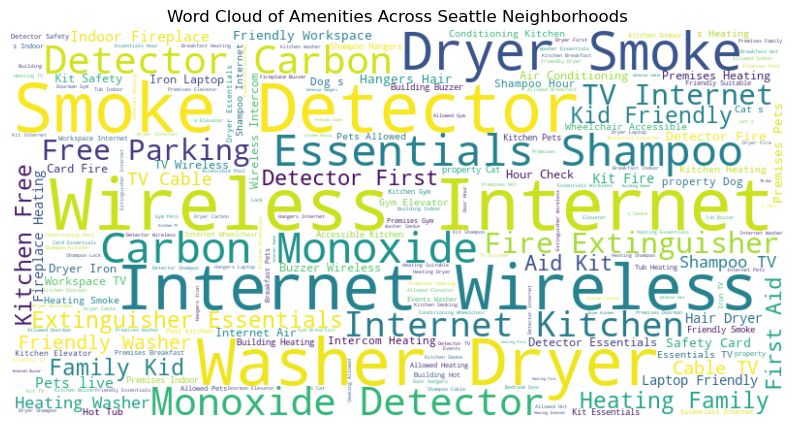

In [35]:
from wordcloud import WordCloud

# Create a string of all amenities
amenities_text = ' '.join(all_amenities)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(amenities_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Amenities Across Seattle Neighborhoods')
plt.show()


<b>Key Observations:</b>

- The most frequently mentioned amenities include Wireless Internet, Smoke Detector, Washer, Dryer, Carbon Monoxide Detector, and Essentials.
- These amenities are core to guest comfort and safety.
- Additional amenities like Kitchen, Shampoo, TV, and Free Parking highlight common expectations for listings.

## Question 3: Trend in reviews


In [36]:
print("\nAnalyzing review trends over time...")
reviews_df['date'] = pd.to_datetime(reviews_df['date'])
reviews_trend = reviews_df.groupby('date').size()
reviews_trend



Analyzing review trends over time...


C:\Users\manys001\AppData\Local\Temp\ipykernel_19676\128275879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df['date'] = pd.to_datetime(reviews_df['date'])


date
2009-06-07      1
2009-06-28      1
2009-07-17      1
2009-08-31      1
2009-09-10      2
             ... 
2015-12-30    109
2015-12-31     75
2016-01-01     92
2016-01-02     95
2016-01-03     36
Length: 1929, dtype: int64

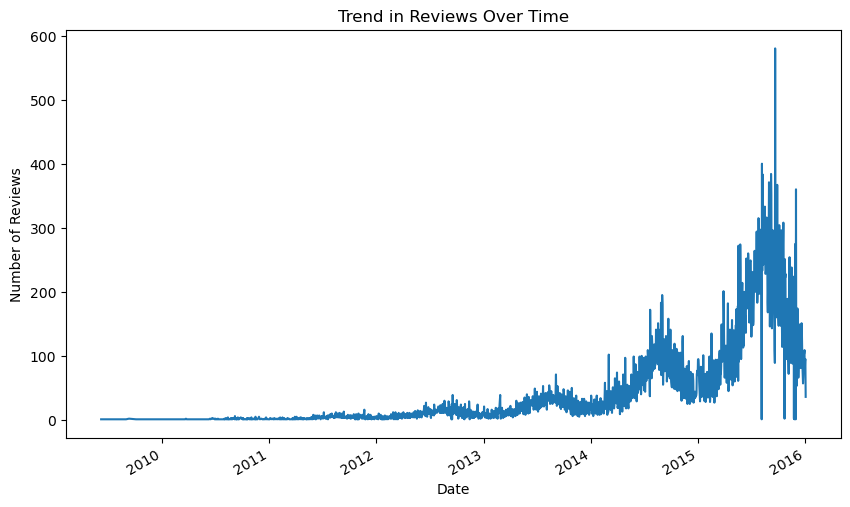

In [37]:
plt.figure(figsize=(10, 6))
reviews_trend.plot(title='Trend in Reviews Over Time', xlabel='Date', ylabel='Number of Reviews')
plt.show()

# Save insights for further communication